In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [3]:
data = pd.read_csv("car_age_price.csv")

In [4]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# Important Information from dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.shape

(112, 2)

In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [8]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [9]:
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


here we can see strong positive correlation

<AxesSubplot:>

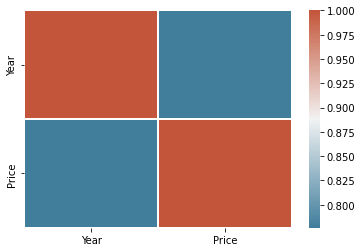

In [10]:
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(data.corr(),cmap=cmap,vmax=1.0,linewidths=0.4)

visualizing the linear models

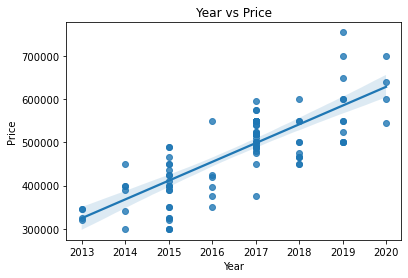

In [11]:
sns.regplot(x = "Year", y = "Price", data = data)
plt.title("Year vs Price")
plt.show()

In [12]:
data["Year"].value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

In [13]:
X=data.drop('Price',axis=1)
y=data.drop('Year',axis=1)

In [14]:
X

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [15]:
y

,Price
0,465000
1,755000
2,700000
3,465000
4,465000
...,...
107,375000
108,300000
109,425000
110,420000


divide the dataset into train and test with 80 percent and 20 percent

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=42)

Building a machine learning model on the train data and predicting on the test data. once predicted we are storing the predicted into y_pred and identifying the MSE and r squared value

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error,r2_score
print('Mean squared error is:',mean_squared_error(y_test,prediction1))
print('R squared error is:',r2_score(y_test,prediction1))



Mean squared error is: 4326906256.829671
R squared error is: 0.36759313425902185


In [18]:
prediction2=model1.predict([[2022]])

print("Price for the year is:",prediction2)

Price for the year is: [[743601.61594504]]


In [19]:
model1.score(X_train,y_train)

0.6389354253755697

In [20]:
model1.score(X_test,y_test)

0.36759313425902185

we can see overfitting here

# Lasso Regression

In [31]:
from sklearn.linear_model import Lasso
lasso=Lasso(1e-3)
model2=lasso.fit(X_train,y_train)
y_pred=model2.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error,r2_score
print('Mean squared error is:',mean_squared_error(y_test,y_pred))
print('R squared error is:',r2_score(y_test,y_pred))


Mean squared error is: 4326906210.343814
R squared error is: 0.3675931410532469


In [29]:
prediction3=model2.predict([[2022]])

In [30]:
print("Price for the year is:",prediction3)

Price for the year is: [743601.61594503]


we can see there is less error value in lassoregression compared  to linearregression